In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from catboost import Pool, cv, CatBoostClassifier

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Загрузка данных

In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

In [3]:
data_train.shape, data_test.shape

((14803, 17), (6344, 18))

In [4]:
data_train.head(10)

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216
6,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216
7,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:15,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216
8,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:20,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216
9,"Заявка № ***********, *******************",Сервис21,2-Средний,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 04:41,2018-02-02 07:52,1-Особая,4-Нет влияния,Система21,Место216


In [5]:
data_test.head(10)

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
5,14808,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-24 07:51,2018-02-16 13:15,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 11:02,2018-02-25 12:20,2-Повышенная,4-Нет влияния,Система13,Место25
6,14809,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-24 07:51,2018-02-16 13:15,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-21 15:07,2018-03-08 07:28,2-Повышенная,4-Нет влияния,Система13,Место25
7,14810,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-24 07:51,2018-02-16 13:15,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 06:13,2018-02-25 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
8,14811,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-24 07:51,2018-02-16 13:15,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 06:13,2018-02-25 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
9,14812,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-04-14 06:36,2018-02-16 13:16,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-22 11:03,2018-03-29 12:21,2-Повышенная,4-Нет влияния,Система13,Место25


In [6]:
data_train.dtypes

Содержание                        object
Сервис                            object
Приоритет                         object
Статус                            object
Функциональная группа             object
Крайний срок                      object
Дата обращения                    object
Тип обращения на момент подачи    object
Тип обращения итоговый            object
Решение                           object
Тип переклассификации              int64
Дата восстановления               object
Дата закрытия обращения           object
Критичность                       object
Влияние                           object
Система                           object
Место                             object
dtype: object

# Exploratory Data Analysis

In [7]:
print("Количество уникальных в трейне: ", data_train['Содержание'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Содержание'].value_counts().shape[0])
content = pd.DataFrame({"Train": data_train['Содержание'].value_counts().head(15), "Test": data_test['Содержание'].value_counts().head(15)})
content

Количество уникальных в трейне:  1465 
Количество уникальных в тесте:  738


,Train,Test
<Бот-наблюдения> Система23. Ухудшение статуса сервиса.,143.0,NaN
Выполнена разблокировка у/з REGION\*****,137.0,NaN
Замена/добавление Сертификат на сервере Система13,241.0,86.0
Запрос на организацию БРМ,152.0,79.0
Заявка на предоставление и отзыв прав доступа к ресурсам,3109.0,1465.0
"Заявка № ***********, *******************",897.0,341.0
Контроль ПУ. Заявка на доступ к портам.,571.0,198.0
Настройка Система8 (для учёта выполненных работ),157.0,NaN
Настройка ЭП в Сервис22,404.0,140.0
Настройка/Консультация /Техническое обслуживание,631.0,289.0


In [8]:
print("Количество уникальных в трейне: ", data_train['Сервис'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Сервис'].value_counts().shape[0])
service = pd.DataFrame({"Train": data_train['Сервис'].value_counts().head(15), "Test": data_test['Сервис'].value_counts().head(15)})
service.transpose()

Количество уникальных в трейне:  153 
Количество уникальных в тесте:  120


,АРМ,Сервис11,Сервис12,Сервис13,Сервис18,Сервис2,Сервис20,Сервис21,Сервис22,Сервис23,Сервис25,Сервис26,Сервис61,Сервис7,Сервис71,Сервис73,Сервис8
Train,3434.0,419.0,241.0,838.0,786.0,808.0,NaN,394.0,1567.0,233.0,NaN,277.0,263.0,1746.0,531.0,399.0,411.0
Test,1073.0,188.0,NaN,311.0,399.0,399.0,291.0,153.0,916.0,NaN,179.0,157.0,192.0,678.0,136.0,131.0,125.0


In [9]:
print("Количество уникальных в трейне: ", data_train['Приоритет'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Приоритет'].value_counts().shape[0])
priority = pd.DataFrame({"Train": data_train['Приоритет'].value_counts(), "Test": data_test['Приоритет'].value_counts()})
priority.transpose()

Количество уникальных в трейне:  4 
Количество уникальных в тесте:  3


,0-Критический,1-Высокий,2-Средний,3-Низкий
Train,3.0,12.0,4694.0,10094.0
Test,NaN,4.0,1805.0,4535.0


In [10]:
print("Количество уникальных в трейне: ", data_train['Статус'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Статус'].value_counts().shape[0])
status = pd.DataFrame({"Train": data_train['Статус'].value_counts(), "Test": data_test['Статус'].value_counts()})
status.transpose()

Количество уникальных в трейне:  2 
Количество уникальных в тесте:  2


,Закрыт,Отменен
Train,14369,434
Test,6189,155


In [11]:
print("Количество уникальных в трейне: ", data_train['Функциональная группа'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Функциональная группа'].value_counts().shape[0])
functional_group = pd.DataFrame({"Train": data_train['Функциональная группа'].value_counts().head(13), "Test": data_test['Функциональная группа'].value_counts().head(13)})
functional_group.transpose()

Количество уникальных в трейне:  555 
Количество уникальных в тесте:  361


,ФГ1,ФГ116,ФГ12,ФГ129,ФГ13,ФГ130,ФГ137,ФГ154,ФГ18,ФГ186,ФГ189,ФГ19,ФГ29,ФГ57,ФГ62,ФГ76,ФГ79,ФГ8
Train,371.0,230.0,1122.0,403.0,3320.0,178.0,407.0,NaN,787.0,NaN,151.0,318.0,NaN,NaN,147.0,NaN,284.0,1103.0
Test,234.0,NaN,400.0,NaN,1714.0,NaN,140.0,76.0,345.0,82.0,NaN,361.0,78.0,83.0,NaN,118.0,122.0,500.0


In [12]:
print("[Крайний срок] Количество уникальных в трейне: ", data_train['Крайний срок'].value_counts().shape[0],
      "\n[Крайний срок] Количество уникальных в тесте: ", data_test['Крайний срок'].value_counts().shape[0])
print("[Дата обращения] Количество уникальных в трейне: ", data_train['Дата обращения'].value_counts().shape[0],
      "\n[Дата обращения] Количество уникальных в тесте: ", data_test['Дата обращения'].value_counts().shape[0])

[Крайний срок] Количество уникальных в трейне:  5666 
[Крайний срок] Количество уникальных в тесте:  2699
[Дата обращения] Количество уникальных в трейне:  7876 
[Дата обращения] Количество уникальных в тесте:  3676


In [13]:
print("Количество уникальных в трейне: ", data_train['Тип обращения на момент подачи'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Тип обращения на момент подачи'].value_counts().shape[0])
type_request_at_time  = pd.DataFrame({"Train": data_train['Тип обращения на момент подачи'].value_counts().head(30), "Test": data_test['Тип обращения на момент подачи'].value_counts().head(30)})
type_request_at_time.transpose()

Количество уникальных в трейне:  2 
Количество уникальных в тесте:  2


,Запрос,Инцидент
Train,14320,483
Test,5914,430


In [14]:
print("Количество уникальных в трейне: ", data_train['Решение             '].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Решение             '].value_counts().shape[0])
solutions = pd.DataFrame({"Train": data_train['Решение             '].value_counts().head(15), "Test": data_test['Решение             '].value_counts().head(15)})
solutions

Количество уникальных в трейне:  1685 
Количество уникальных в тесте:  953


,Train,Test
"Выполнена разблокировка учетной записи Ne_boss\********* и повторный сброс пароля,идентификация пройдена,блокировка вызвана легальным пользователем.Причина-Не определена.Заявител проинформирован.",NaN,79.0
Личность пользователя идентифицирована\nПричина нарушения: Другая\nВыполнена разблокировка учетной записи: ne_Boss\***********,353.0,200.0
Выполнена загрузка разделителей согласно вложению в заявке,NaN,65.0
Выполнена разблокировка у/з Ne_bosS\*********\nИдентификация пользователя осуществлена.\nОбъект доступа легален.\nПричина нарушения: Несколько раз неправильный ввод пароля,146.0,NaN
Выполнено,900.0,297.0
Выполнено.,354.0,74.0
"Добрый день!\nВ текущем релизе Система18 реализована функция создания новой редакции текущего договора/ДС для дальнейшего внесения исправлений.\nВ режиме ""Сведения договора"" - ""Редакции/Версии договора"" для Вашего договора создана новая редакция в статусе Проект, в которую возможно внести все необходимые изменения.\nВход и редактирование осуществляется по нажатию значка ""Карандаш"".\nДалее, необходимо заполнить поле ""Основание внесения исправлений"", указав там причину внесения изменений и затем уже вносить требуемые изменения.\nПереход между пунктами осуществляется аналогично, как и при первичной регистрации договора/ДС, посредством нажатия кнопки ""Далее"".\nПосле заполнения необходимо, также зарегистрировать договор/ДС и осуществить отправку в Сервис22. Реестровый номер не изменится.\n\nПри наличии дополнительных вопросов, просьба перезвонить по тел. **********",148.0,NaN
Доступ предоставлен,236.0,115.0
Доступ предоставлен согласно заявке,123.0,NaN
Запрос отменён пользователем из портала самообслуживания,377.0,137.0


In [15]:
print("\n\nТип переклассификации: ")
print(pd.DataFrame({"Train": data_train['Тип переклассификации'].value_counts()}).transpose())
print("\n\nТип обращения итоговый: ")
print(pd.DataFrame({"Train": data_train['Тип обращения итоговый'].value_counts()}).transpose())



Тип переклассификации: 
           0    2    1
Train  14445  218  140


Тип обращения итоговый: 
       Запрос  Инцидент
Train   14398       405


In [16]:
print("Количество уникальных в трейне: ", data_train['Критичность'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Критичность'].value_counts().shape[0])
criticality  = pd.DataFrame({"Train": data_train['Критичность'].value_counts().head(30), "Test": data_test['Критичность'].value_counts().head(30)})
criticality.transpose()

Количество уникальных в трейне:  4 
Количество уникальных в тесте:  4


,4-Нет,1-Особая,2-Повышенная,3-Базовая
Train,6775,4717,2370,941
Test,2555,1813,1496,480


In [17]:
print("Количество уникальных в трейне: ", data_train['Влияние'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Влияние'].value_counts().shape[0])
influence  = pd.DataFrame({"Train": data_train['Влияние'].value_counts().head(30), "Test": data_test['Влияние'].value_counts().head(30)})
influence.transpose()

Количество уникальных в трейне:  4 
Количество уникальных в тесте:  4


,4-Нет влияния,3-Малое,2-Значительное,1-Всеохватывающее
Train,9123,5615,60,5
Test,4034,2279,29,2


In [18]:
print("Количество уникальных в трейне: ", data_train['Система'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Система'].value_counts().shape[0])
system  = pd.DataFrame({"Train": data_train['Система'].value_counts().head(15), "Test": data_test['Система'].value_counts().head(15)})
system.transpose()

Количество уникальных в трейне:  201 
Количество уникальных в тесте:  151


,База,Система101,Система11,Система13,Система138,Система18,Система2,Система20,Система21,Система22,Система23,Система25,Система26,Система52,Система61,Система7,Система71
Train,3508.0,452.0,429.0,988.0,531.0,784.0,812.0,NaN,395.0,966.0,233.0,200.0,269.0,NaN,263.0,1719.0,399.0
Test,1058.0,171.0,189.0,349.0,NaN,399.0,400.0,133.0,153.0,706.0,NaN,178.0,153.0,189.0,192.0,668.0,131.0


In [19]:
print("Количество уникальных в трейне: ", data_train['Место'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Место'].value_counts().shape[0])
place  = pd.DataFrame({"Train": data_train['Место'].value_counts().head(15), "Test": data_test['Место'].value_counts().head(15)})
place.transpose()

Количество уникальных в трейне:  314 
Количество уникальных в тесте:  274


,К,Место1,Место10,Место13,Место146,Место15,Место157,Место2,Место25,Место3,Место31,Место32,Место41,Место42,Место5,Место51,Место57,Место8
Train,409.0,744.0,NaN,322.0,227.0,239.0,252.0,251.0,305.0,1039.0,199.0,519.0,249.0,NaN,NaN,244.0,327.0,298.0
Test,250.0,344.0,123.0,137.0,92.0,83.0,NaN,97.0,108.0,438.0,173.0,226.0,NaN,78.0,102.0,82.0,112.0,NaN


# Feature Engineering

In [20]:
import datetime
import nltk
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords


def extract_time(data, name):
    '''
    Функция для извлечения признаков из времени
    
    Аргументы:
    data -- pandas dataframe с временными рядами
    
    Возвращает:
    pandas dataframe с извлеченными признаками из времени
    '''
    name = name.replace(' ', '_')
    
    weekday = data.dt.weekday.fillna(0)
    hour = data.dt.hour.fillna(0)
    day_of_week = data.dt.day_of_week.fillna(0)
    
    result_df = pd.DataFrame({name + '_weekday': weekday.astype(int).astype('category'),
                              name + '_hour': hour.astype(int).astype('category'),
                              name + '_day_of_week': day_of_week.astype(int).astype('category'),
                              name + '_hour': hour.astype(int).astype('category'),
                              name + '_sin_hour': np.sin(hour.astype(int)),
                              name + '_cos_hour': np.cos(hour.astype(int))})
    
    return result_df, list(result_df.columns)

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    return tokens


def prepare_data(data, is_test=False):
    '''
    Функция для подготовки данных к обучению или тестированию
    
    Аргументы:
    data -- pandas dataframe с исходными признаками
    
    Возвращает:
    pandas dataframe с извлеченными признаками для модели
    '''
    # Работа со временем
    date_columns = ['Крайний срок', 'Дата обращения', 'Дата закрытия обращения', 'Дата восстановления']
    date_cols_preprocess = []
    
    time_to_complete = pd.to_datetime(data['Дата закрытия обращения']) - pd.to_datetime(data['Дата обращения'])
    about_the_deadline = pd.to_datetime(data['Дата закрытия обращения']) - pd.to_datetime(data['Крайний срок'])
    data['time_to_complete'] = time_to_complete.dt.seconds
    data['about_the_deadline'] = about_the_deadline.dt.seconds
    data['exiting_the_deadline'] = data['time_to_complete'] - data['about_the_deadline']
    
    for date_col in date_columns:
        prep_date, new_date_names = extract_time(pd.to_datetime(data[date_col]), date_col)
        data[new_date_names] = prep_date
    data = data.drop(columns=date_columns)
    
    data['Содержание'] = data['Содержание'].astype(str).str.lower()
    data['Решение'] = data['Решение             '].astype(str).str.lower()
    
    text_content = data['Содержание'].apply(lemmatize)
    text_solution = data['Решение'].apply(lemmatize)
    
    for i in range(text_content.shape[0]):
        text_content[i] = " ".join(text_content[i])
        text_solution[i] = " ".join(text_solution[i])
    
    data['Содержание'] = text_content
    data['Решение'] = text_solution
    data = data.drop(columns=['Решение             '])
    
    return data


nltk.download('stopwords')
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Artemiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
%%time
train_df = prepare_data(data_train)
test_df = prepare_data(data_test)
print(train_df.shape, test_df.shape)

(14803, 36) (6344, 37)
CPU times: total: 24.4 s
Wall time: 24.5 s


In [22]:
float_cols = ['Крайний_срок_sin_hour', 'Крайний_срок_cos_hour', 
              'Дата_обращения_sin_hour', 'Дата_обращения_cos_hour',
              'Дата_закрытия_обращения_sin_hour', 'Дата_закрытия_обращения_cos_hour', 
              'Дата_восстановления_sin_hour', 'Дата_восстановления_cos_hour',
              'time_to_complete', 'about_the_deadline', 'exiting_the_deadline']

date_cols = list(train_df.drop(columns=float_cols).columns)[13:]

days = [col for col in date_cols if "_day" in col]
days_of_week = [col for col in date_cols if "_day_of_week" in col]
hours = [col for col in date_cols if "_hour" in col]
weekdays = [col for col in date_cols if "_weekday" in col]

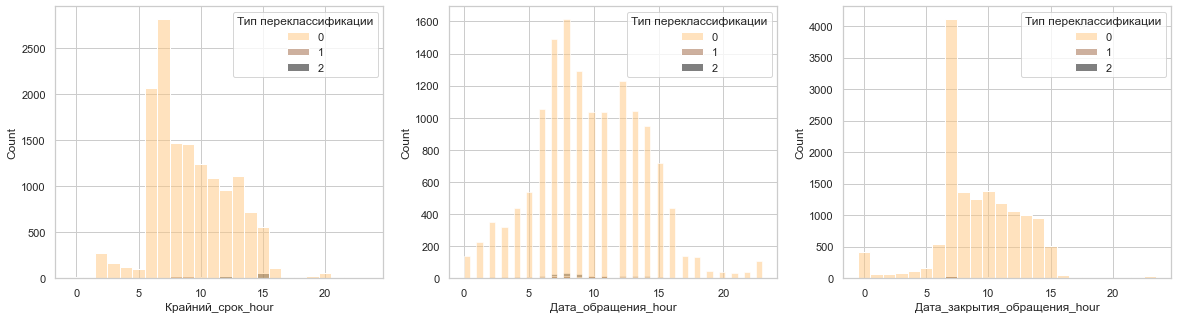

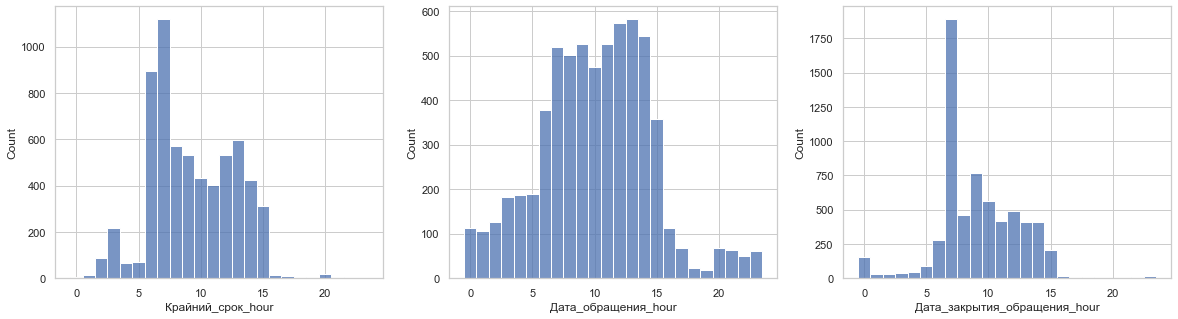

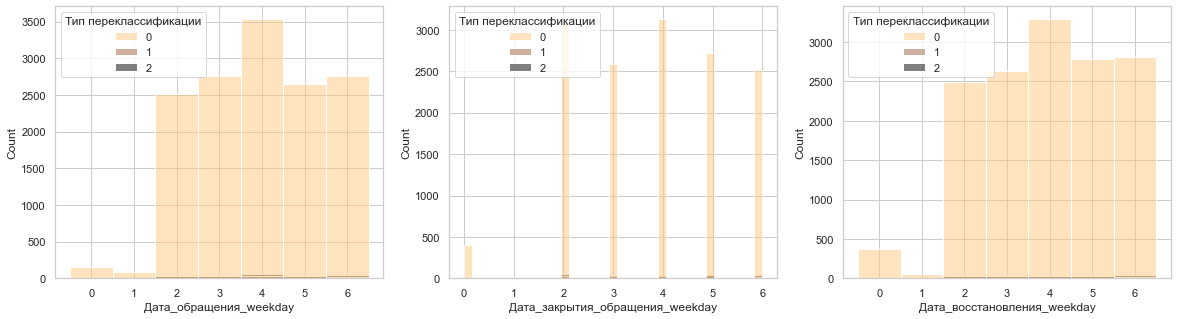

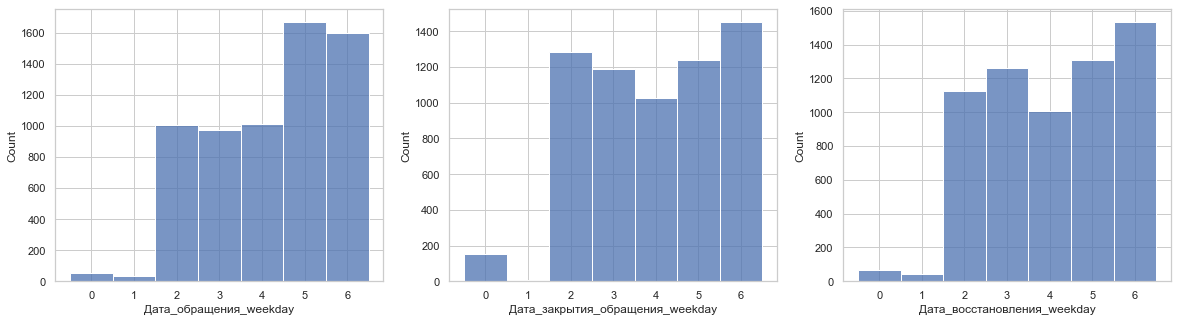

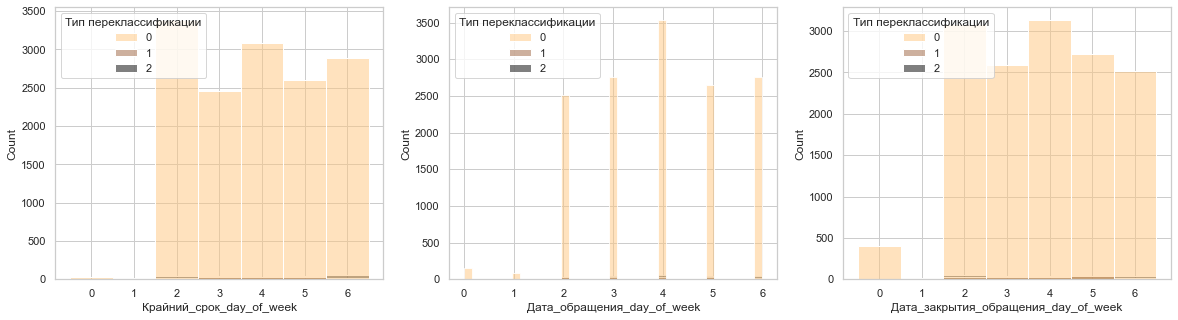

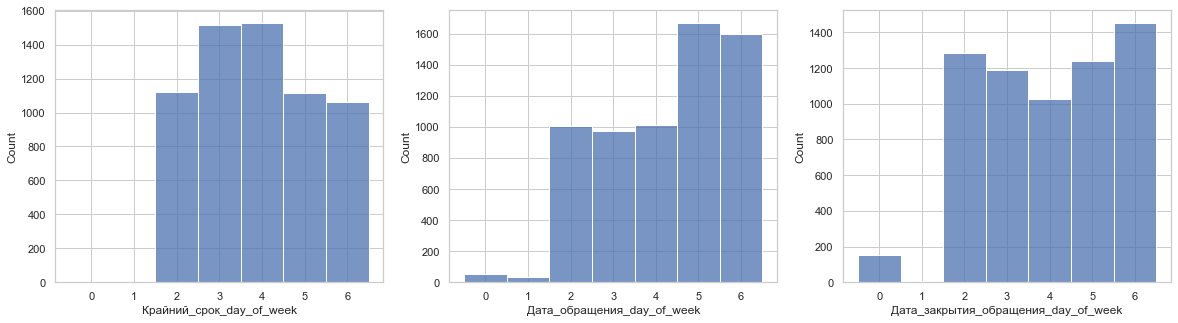

In [25]:
sns.set(rc={'figure.figsize':(20, 5)})
sns.set_style('whitegrid')

groups = [hours, weekdays, days_of_week]
for group_cols in groups:
    fig, ax = plt.subplots(1, 3)
    sns.histplot(x=train_df[group_cols].iloc[:, 0], hue=train_df['Тип переклассификации'], ax=ax[0], palette='copper_r');
    sns.histplot(x=train_df[group_cols].iloc[:, 1].astype(int), hue=train_df['Тип переклассификации'], ax=ax[1], palette='copper_r');
    sns.histplot(x=train_df[group_cols].iloc[:, 2], hue=train_df['Тип переклассификации'], ax=ax[2], palette='copper_r');
    plt.show()
    
    fig, ax = plt.subplots(1, 3)
    sns.histplot(x=test_df[group_cols].iloc[:, 0], ax=ax[0], palette='copper_r');
    sns.histplot(x=test_df[group_cols].iloc[:, 1], ax=ax[1], palette='copper_r');
    sns.histplot(x=test_df[group_cols].iloc[:, 2], ax=ax[2], palette='copper_r');
    plt.show()

# Get SBERT and LaBSE embeddings

In [26]:
train_LaBSE_solution = np.load("train_LaBSE_solution.npy")
train_LaBSE_content = np.load("train_LaBSE_content.npy")
train_SBERT_solution = np.load("train_SBERT_solution.npy")
train_SBERT_content = np.load("train_SBERT_content.npy")
train_LaBSE_solution.shape, train_LaBSE_content.shape, train_SBERT_solution.shape, train_SBERT_content.shape

((14803, 768), (14803, 768), (14803, 1024), (14803, 1024))

In [27]:
LaBSE_solution_columns = ["LaBSE_solution" + str(i) for i in range(train_LaBSE_solution.shape[1])]
LaBSE_content_columns = ["LaBSE_content" + str(i) for i in range(train_LaBSE_content.shape[1])]
SBERT_solution_columns = ["SBERT_solution" + str(i) for i in range(train_SBERT_solution.shape[1])]
SBERT_content_columns = ["SBERT_content" + str(i) for i in range(train_SBERT_content.shape[1])]

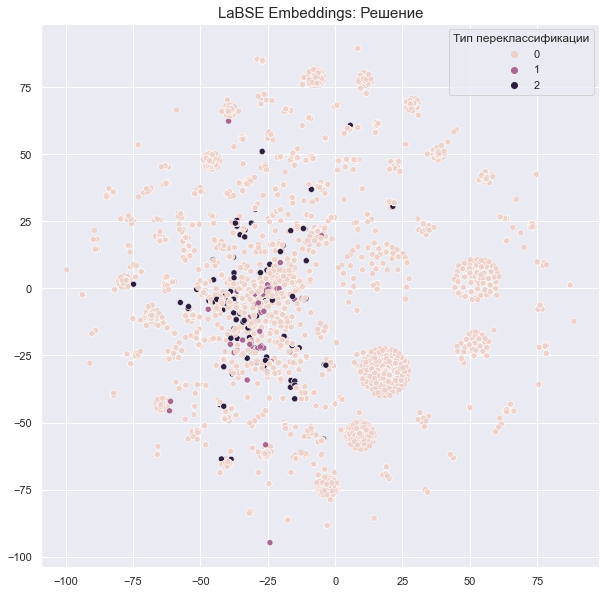

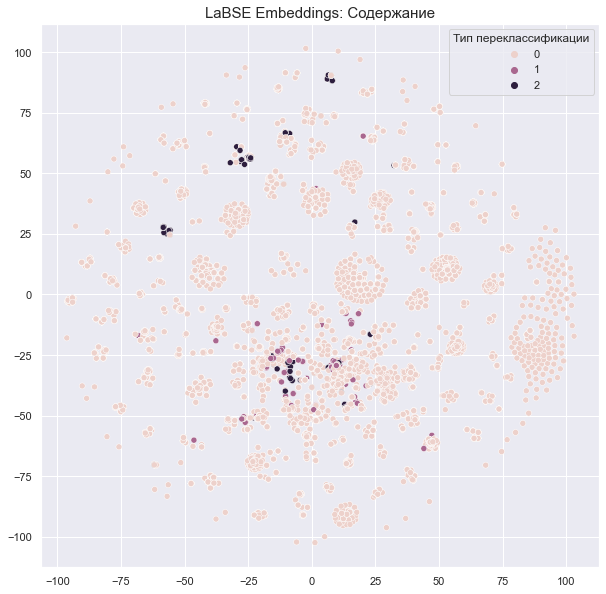

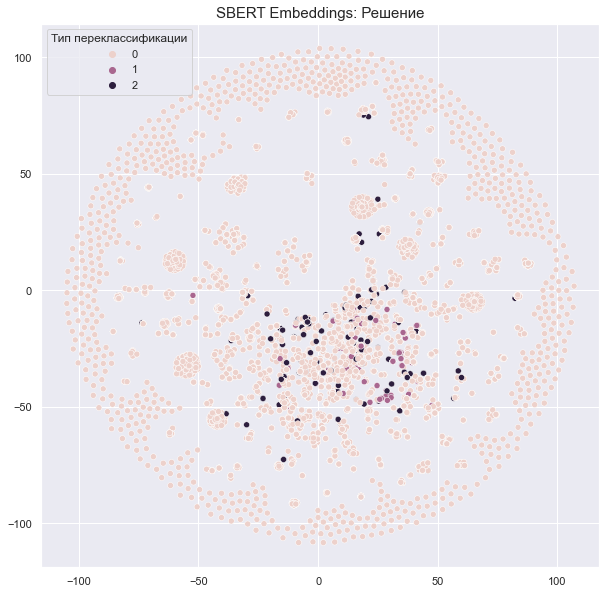

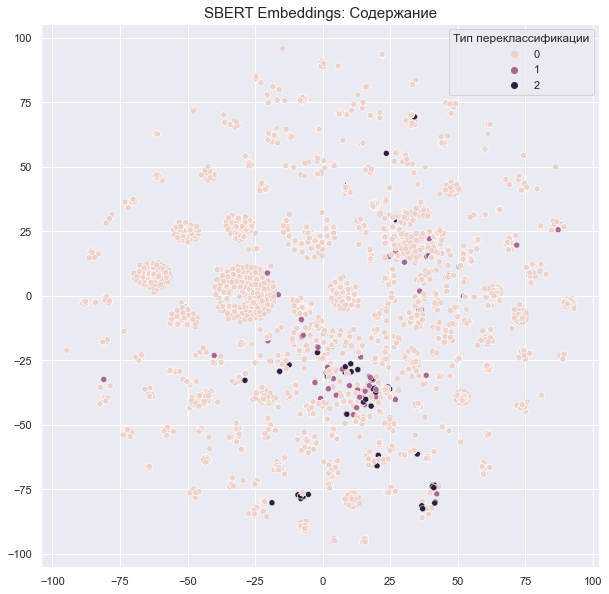

In [28]:
from sklearn.manifold import TSNE

for i, data in enumerate([train_LaBSE_solution, train_LaBSE_content, train_SBERT_solution, train_SBERT_content]):
    model = TSNE(n_components=2)
    transformed = model.fit_transform(X=data, 
                                      y=train_df['Тип переклассификации'])
    X_train_axis, y_train_axis = transformed[:, 0], transformed[:, 1]
    
    type_data = ['Решение', 'Содержание']
    type_model = ['LaBSE', 'LaBSE', 'SBERT', 'SBERT']
    
    sns.set(rc={'figure.figsize':(10, 10)})
    plot = sns.scatterplot(x=X_train_axis, y=y_train_axis, hue=train_df['Тип переклассификации']);
    plot.set_title(type_model[i] + " Embeddings: " + type_data[i % 2], fontsize=15);
    plt.show()


# CatBoost Model + LaBSE

In [29]:
train_df['Содержание'] = train_df['Содержание'].fillna("Ничего")
target_columns = ['Тип переклассификации', 'Тип обращения итоговый']
cat_cols = list(train_df.drop(columns=target_columns + float_cols + ["Содержание", "Решение"]).columns)

### Добавляем эмбеддинги

In [30]:
train_df[LaBSE_solution_columns] = train_LaBSE_solution
train_df[LaBSE_content_columns] = train_LaBSE_content

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop(columns=target_columns + ['Содержание', 'Решение']), 
                                                      train_df['Тип переклассификации'], test_size=0.2, random_state=17)
X_train.shape, X_valid.shape

((11842, 1568), (2961, 1568))

In [32]:
for cat_col in cat_cols:
    train_df[cat_col] = train_df[cat_col].astype("category")

### Кросс-валидация на 5 фолдах

In [34]:
from sklearn.model_selection import ShuffleSplit
from catboost import Pool, cv
from imblearn.over_sampling import RandomOverSampler

params = {
    'loss_function': 'MultiClass',
    'random_seed': 63,
    'iterations': 170,
    'learning_rate': 0.05,
    'task_type': 'CPU',
    'eval_metric': 'TotalF1',
}

X = train_df.drop(columns=target_columns + ['Содержание', 'Решение'])
y = train_df['Тип переклассификации']

shuffle_split = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
cv_data = cv(
    params=params,
    pool=Pool(data=X, label=y, cat_features=cat_cols),
    verbose=False,
    folds=shuffle_split,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.9906083461
bestIteration = 163

Training on fold [1/5]

bestTest = 0.9892641154
bestIteration = 161

Training on fold [2/5]

bestTest = 0.9874771133
bestIteration = 140

Training on fold [3/5]

bestTest = 0.9910512116
bestIteration = 127

Training on fold [4/5]

bestTest = 0.9904183179
bestIteration = 164



### Сэмплирование классов меньшинства

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [36]:
X_resampled.shape

(34659, 1568)

### Обучение на отложенной выборке

In [37]:
train_pool = Pool(data=X_resampled, label=y_resampled, cat_features=cat_cols)
valid_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

In [38]:
model_with_labse = CatBoostClassifier(
    random_seed=63,
    loss_function='MultiClass',
    iterations=500,
    learning_rate=0.03,
    task_type='CPU',
    eval_metric='TotalF1',
)

model_with_labse.fit(
    train_pool,
    verbose=50,
    eval_set=valid_pool,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9343288	test: 0.9190485	best: 0.9190485 (0)	total: 824ms	remaining: 6m 51s
50:	learn: 0.9899201	test: 0.9718350	best: 0.9718350 (50)	total: 41.3s	remaining: 6m 3s
100:	learn: 0.9959555	test: 0.9859842	best: 0.9860659 (98)	total: 1m 21s	remaining: 5m 22s
150:	learn: 0.9969682	test: 0.9884937	best: 0.9885133 (138)	total: 2m 2s	remaining: 4m 43s
200:	learn: 0.9978926	test: 0.9890995	best: 0.9890995 (154)	total: 2m 41s	remaining: 4m
250:	learn: 0.9982392	test: 0.9894083	best: 0.9894083 (207)	total: 3m 21s	remaining: 3m 19s
300:	learn: 0.9987878	test: 0.9892772	best: 0.9899797 (272)	total: 4m 1s	remaining: 2m 39s
350:	learn: 0.9991631	test: 0.9892772	best: 0.9899797 (272)	total: 4m 41s	remaining: 1m 59s
400:	learn: 0.9991920	test: 0.9891724	best: 0.9899797 (272)	total: 5m 19s	remaining: 1m 18s
450:	learn: 0.9992208	test: 0.9891724	best: 0.9899797 (272)	total: 5m 58s	remaining: 38.9s
499:	learn: 0.9993363	test: 0.9891724	best: 0.9899797 (272)	total: 6m 35s	remaining: 0us

bestTes

### Feature Importance

In [39]:
fi = model_with_labse.get_feature_importance(train_pool, prettified=True)
fi.head(25)

,Feature Id,Importances
0,Тип обращения на момент подачи,60.456116
1,Функциональная группа,5.310099
2,LaBSE_solution188,4.384629
3,Система,2.067425
4,LaBSE_solution69,1.467033
5,LaBSE_content399,1.236928
6,LaBSE_solution329,1.046414
7,LaBSE_content477,0.950830
8,Приоритет,0.752828
9,LaBSE_content397,0.718710


In [40]:
from sklearn.metrics import classification_report

predictions = model_with_labse.predict(valid_pool)
predictions = np.array(predictions).reshape(1, -1)[0]

In [41]:
pd.DataFrame({"Predictions": pd.Series(predictions).value_counts(), 
              "Real": y_valid.value_counts()})

,Predictions,Real
0,2888,2892
1,31,36
2,42,33


In [42]:
print(classification_report(y_valid.to_numpy(), predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2892
           1       0.84      0.72      0.78        36
           2       0.71      0.91      0.80        33

    accuracy                           0.99      2961
   macro avg       0.85      0.88      0.86      2961
weighted avg       0.99      0.99      0.99      2961



In [43]:
predictions_proba_model_with_labse = model_with_labse.predict_proba(Pool(X_valid, y_valid, cat_features=cat_cols))

# CatBoost Model + SBERT

### Добавляем эмбеддинги

In [ ]:
train_df = train_df.drop(columns=LaBSE_content_columns + LaBSE_solution_columns)

In [54]:
train_df[SBERT_solution_columns] = train_SBERT_solution
train_df[SBERT_content_columns] = train_SBERT_content

In [55]:
target_columns = ['Тип переклассификации', 'Тип обращения итоговый']
X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop(columns=target_columns + ["Содержание", "Решение"]), 
                                                      train_df['Тип переклассификации'], test_size=0.2, random_state=17)
X_train.shape, X_valid.shape

((11842, 2080), (2961, 2080))

### Сэмплирование классов меньшинства

In [56]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [57]:
X_resampled.shape

(34659, 2080)

### Обучение на отложенной выборке

In [58]:
from catboost import Pool, cv, CatBoostClassifier

model_with_sbert = CatBoostClassifier(
    random_seed=63,
    loss_function='MultiClass',
    iterations=500,
    learning_rate=0.03,
    task_type='CPU',
    eval_metric='TotalF1',
)

model_with_sbert.fit(
    Pool(data=X_resampled, label=y_resampled, cat_features=cat_cols),
    verbose=50,
    eval_set=Pool(data=X_valid, label=y_valid, cat_features=cat_cols),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9498834	test: 0.9216716	best: 0.9216716 (0)	total: 1.22s	remaining: 10m 8s
50:	learn: 0.9928555	test: 0.9771355	best: 0.9774014 (49)	total: 1m 3s	remaining: 9m 18s
100:	learn: 0.9960722	test: 0.9845368	best: 0.9845368 (99)	total: 1m 57s	remaining: 7m 44s
150:	learn: 0.9981529	test: 0.9891614	best: 0.9891614 (148)	total: 2m 53s	remaining: 6m 41s
200:	learn: 0.9984415	test: 0.9900054	best: 0.9900054 (153)	total: 3m 43s	remaining: 5m 31s
250:	learn: 0.9985281	test: 0.9900054	best: 0.9900054 (153)	total: 4m 32s	remaining: 4m 30s
300:	learn: 0.9988168	test: 0.9902331	best: 0.9905828 (284)	total: 5m 19s	remaining: 3m 31s
350:	learn: 0.9989034	test: 0.9905828	best: 0.9908998 (330)	total: 6m 6s	remaining: 2m 35s
400:	learn: 0.9990188	test: 0.9908998	best: 0.9908998 (330)	total: 6m 53s	remaining: 1m 42s
450:	learn: 0.9991054	test: 0.9911644	best: 0.9911644 (407)	total: 7m 39s	remaining: 49.9s
499:	learn: 0.9993652	test: 0.9911644	best: 0.9911644 (407)	total: 8m 24s	remaining: 0us

b

### Feature Importance

In [59]:
fi = model_with_sbert.get_feature_importance(Pool(X_resampled, y_resampled, cat_features=cat_cols), prettified=True)
fi.head(25)

,Feature Id,Importances
0,Тип обращения на момент подачи,58.281047
1,Функциональная группа,3.387164
2,Сервис,1.903896
3,SBERT_solution188,1.832565
4,SBERT_solution308,1.738285
5,SBERT_solution1001,1.640382
6,SBERT_solution331,1.507888
7,SBERT_solution153,1.337659
8,Приоритет,1.266576
9,SBERT_solution332,0.953619


In [60]:
from sklearn.metrics import classification_report

predictions = model_with_sbert.predict(Pool(X_valid, y_valid, cat_features=cat_cols))
predictions = np.array(predictions).reshape(1, -1)[0]
pd.DataFrame({"Predictions": pd.Series(predictions).value_counts(), 
              "Real": y_valid.value_counts()})

,Predictions,Real
0,2894,2892
1,28,36
2,39,33


In [61]:
print(classification_report(y_valid.to_numpy(), predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2892
           1       0.93      0.72      0.81        36
           2       0.74      0.88      0.81        33

    accuracy                           0.99      2961
   macro avg       0.89      0.87      0.87      2961
weighted avg       0.99      0.99      0.99      2961



In [62]:
predictions_proba_model_with_sbert = model_with_sbert.predict_proba(Pool(X_valid, y_valid, cat_features=cat_cols))

# FinalModel

In [63]:
train_df = train_df.drop(columns=SBERT_solution_columns + SBERT_content_columns)
train_df[LaBSE_solution_columns] = train_LaBSE_solution
train_df[LaBSE_content_columns] = train_LaBSE_content

In [64]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df.drop(columns=target_columns + ["Содержание", "Решение"]), train_df['Тип переклассификации'])

In [65]:
from catboost import Pool, cv, CatBoostClassifier

model_with_labse = CatBoostClassifier(
    random_seed=63,
    loss_function='MultiClass',
    iterations=500,
    learning_rate=0.03,
    task_type='CPU',
    eval_metric='TotalF1',
)

model_with_labse.fit(
    Pool(data=X_resampled, label=y_resampled, cat_features=cat_cols),
    verbose=50,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9379082	total: 989ms	remaining: 8m 13s
50:	learn: 0.9887071	total: 45.3s	remaining: 6m 39s
100:	learn: 0.9956565	total: 1m 29s	remaining: 5m 55s
150:	learn: 0.9969518	total: 2m 13s	remaining: 5m 8s
200:	learn: 0.9975065	total: 2m 57s	remaining: 4m 24s
250:	learn: 0.9979454	total: 3m 40s	remaining: 3m 39s
300:	learn: 0.9982686	total: 4m 22s	remaining: 2m 53s
350:	learn: 0.9983610	total: 5m 6s	remaining: 2m 10s
400:	learn: 0.9984534	total: 5m 48s	remaining: 1m 26s
450:	learn: 0.9988228	total: 6m 29s	remaining: 42.3s
499:	learn: 0.9990768	total: 7m 8s	remaining: 0us


# Predictions on Test

In [66]:
ids = test_df['id']

LaBSE_test_solution = np.load("test_LaBSE_solution.npy")
LaBSE_test_content = np.load("test_LaBSE_content.npy")

test_df[LaBSE_solution_columns] = LaBSE_test_solution
test_df[LaBSE_content_columns] = LaBSE_test_content
test_df = test_df.drop(columns=target_columns + ['id', 'Содержание', 'Решение'])

In [67]:
predictions = model_with_labse.predict(test_df)
predictions = pd.Series(predictions.reshape(1, -1)[0])

In [68]:
submission['Тип переклассификации'] = predictions
submission['Тип обращения на момент подачи'] = test_df['Тип обращения на момент подачи']
submission['Тип обращения итоговый'] = np.where(submission['Тип переклассификации'] == 0, submission['Тип обращения на момент подачи'], 
                     np.where(submission['Тип переклассификации'] == 1, "Инцидент", "Запрос"))
submission = submission.drop(columns=['Тип обращения на момент подачи'])

In [69]:
submission['Тип переклассификации'].value_counts()

0    5972
2     338
1      34
Name: Тип переклассификации, dtype: int64

In [70]:
submission.to_csv("GibData_Submit.csv", index=False)

In [71]:
submission["Тип переклассификации"].loc[test_df["Статус"] == "Отменен"] = 0
submission["Тип обращения итоговый"].loc[test_df["Статус"] == "Отменен"] = test_df["Тип обращения на момент подачи"]